In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#read in the general csv too
#df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores.csv")

In [4]:
#read in the general csv too
df_general  = pd.read_csv("/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/antagonist_redo_quarter_real_refined_placements_delta_scores.csv")

In [5]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

In [6]:
len(df_general)

11478716

In [7]:
df_general

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37
0,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000233746381/placements/4s0v_receptor_only_PV-000233746381_18_2.pdb,-17.546616,-11.935419,-5.611197,8.0,8.0,0.0,4.0,2.0,2.0,0.25,0.250000,0.000000,1,0,1.0,-0.804754,0.000000,-0.804754,100,100,0.0,0,0,0.0,0,0,0.0,94.898630,98.314581,-3.415951,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,2.959998,0.0,NaN
1,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000233746381/placements/4s0v_receptor_only_PV-000233746381_36_0.pdb,-17.546616,-9.690326,-7.856290,8.0,6.0,2.0,4.0,1.0,3.0,0.25,0.166667,0.083333,1,0,1.0,-0.804754,0.000000,-0.804754,100,100,0.0,0,0,0.0,0,0,0.0,94.898630,97.476341,-2.577711,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,6.489842,0.0,NaN
2,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000233746381/placements/4s0v_receptor_only_PV-000233746381_43_4.pdb,-17.546616,-13.828486,-3.718130,8.0,7.0,1.0,4.0,3.0,1.0,0.25,0.428571,-0.178571,1,0,1.0,-0.804754,0.000000,-0.804754,100,100,0.0,0,0,0.0,0,0,0.0,94.898630,96.600085,-1.701455,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,1.898880,0.2,NaN
3,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000233746381/placements/4s0v_receptor_only_PV-000233746381_160_5.pdb,-17.546616,-11.289533,-6.257083,8.0,8.0,0.0,4.0,2.0,2.0,0.25,0.125000,0.125000,1,1,0.0,-0.804754,-0.918747,0.113993,100,100,0.0,0,0,0.0,0,0,0.0,94.898630,98.916720,-4.018090,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/proj

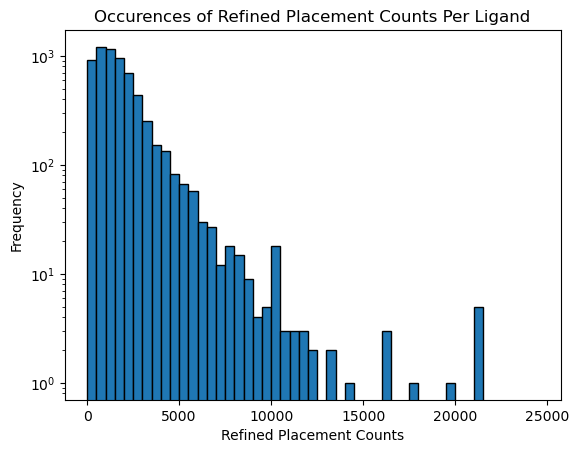

In [8]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_general['file_initial'].value_counts()

bin_edges = np.arange(0, 25000, 500)

plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Refined Placement Counts')
plt.ylabel('Frequency')
plt.title('Occurences of Refined Placement Counts Per Ligand')

# Show the plot
plt.show()

In [9]:
# Extract ligand names using a regular expression
df_general['ligand_name'] = df_general['file_compare'].str.extract(r'4s0v_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands_general = df_general['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 5360


In [10]:
#df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
#plt.show()

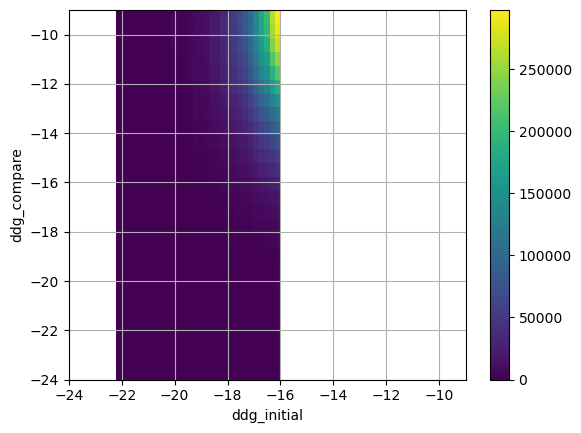

In [11]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

#plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')

plt.colorbar()

plt.ylim(-24,-9)
plt.xlim(-24,-9)

plt.grid(True)
plt.show()

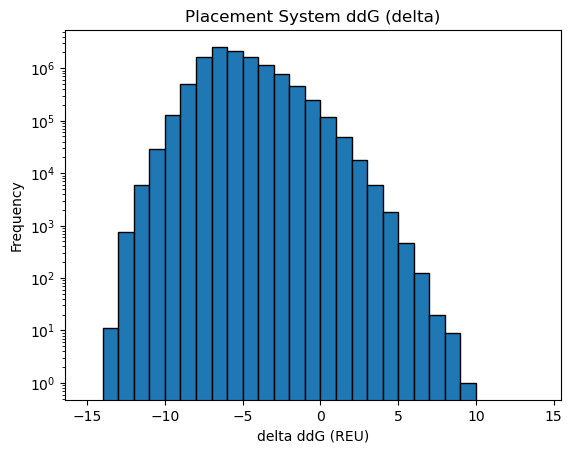

In [12]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-15, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

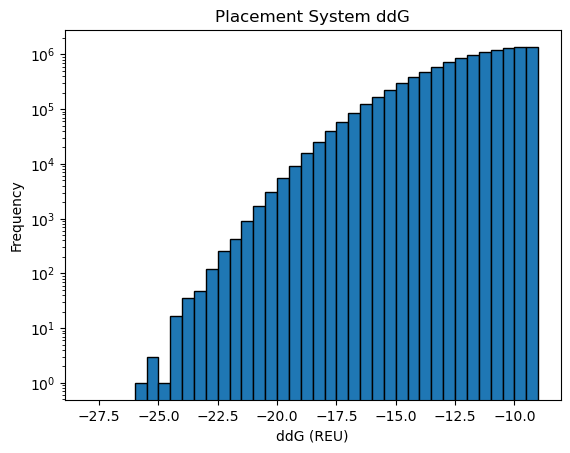

In [13]:
#plot the delta ddg in histogram
x = df_general['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

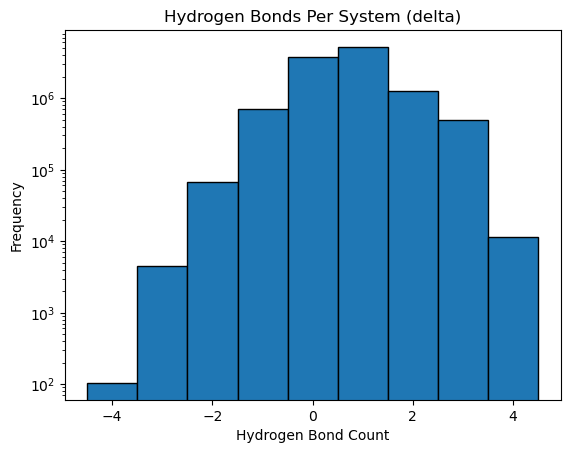

In [14]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

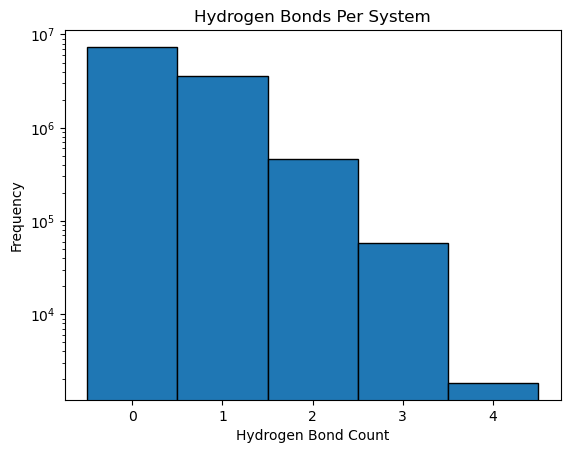

In [15]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

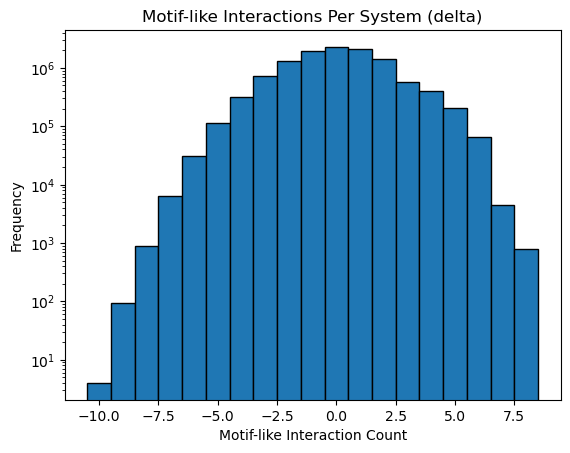

In [16]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

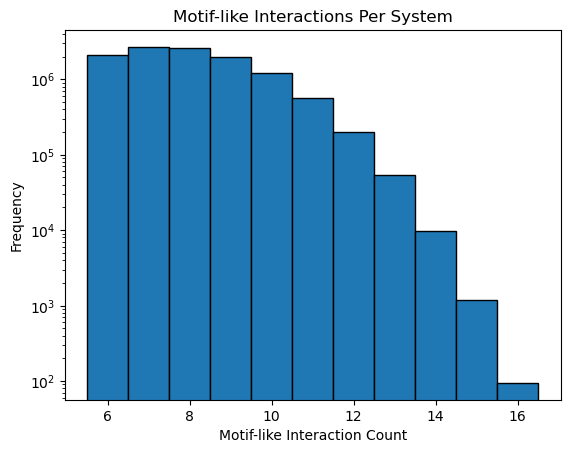

In [17]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

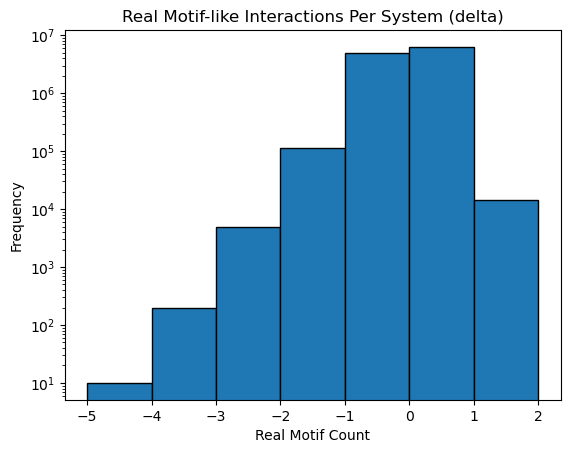

In [18]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta'] * df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

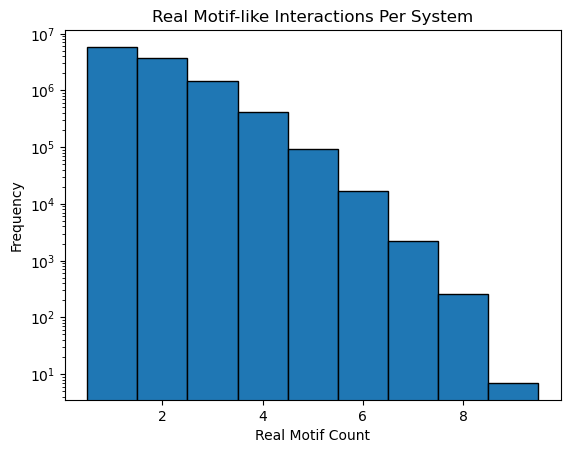

In [19]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare'] * df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

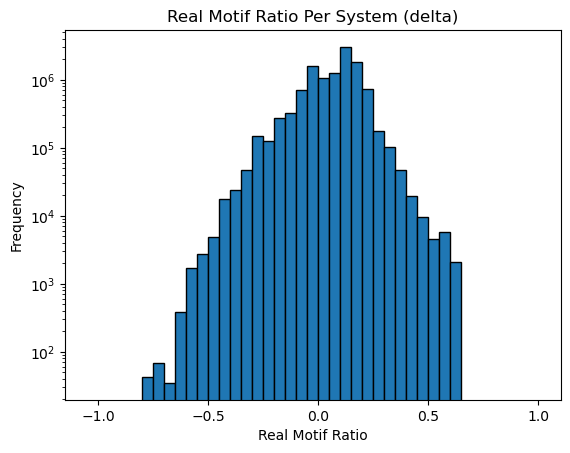

In [20]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

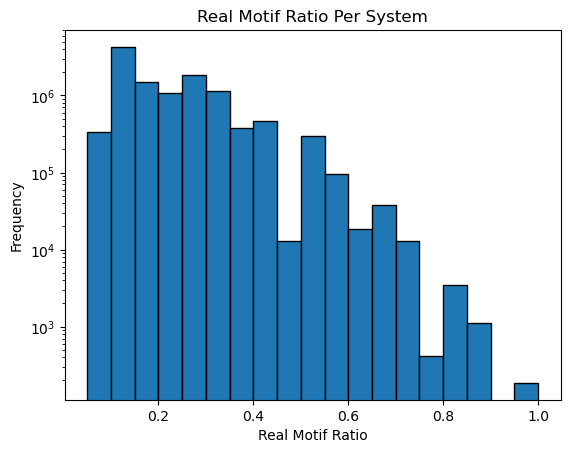

In [21]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

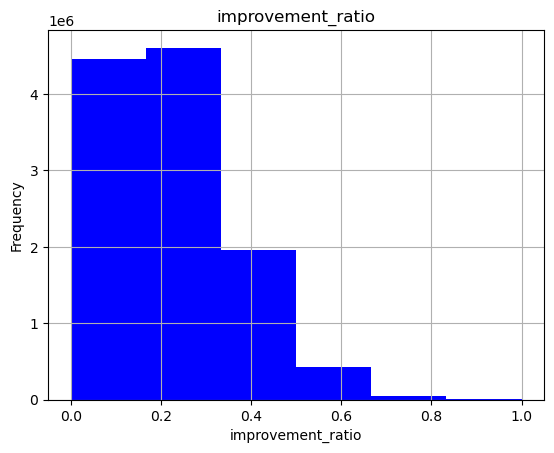

In [22]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [59]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 0) & (df_general['rmsd'] <= 6) & (df_general['real_motif_ratio_compare'] >= 0.25) & (df_general['ddg_delta'] > 0) & (df_general['ddg_compare'] <= -21)]

In [60]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
84772,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000420812175/placements/4s0v_receptor_only_PV-000420812175_33_4.pdb,-17.472476,-21.676692,4.204216,8.0,9.0,-1.0,4.0,3.0,1.0,0.375000,0.333333,0.041667,1,1,0.0,-0.455167,-0.974287,0.519120,100,100,0.0,0,0,0.0,0,0,0.0,95.447357,90.682354,4.765003,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,5.023053,0.4,NaN,PV-000420812175
86465,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_7.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000420812175/placements/4s0v_receptor_only_PV-000420812175_33_4.pdb,-17.573277,-21.676692,4.103415,8.0,9.0,-1.0,5.0,3.0,2.0,0.375000,0.333333,0.041667,1,1,0.0,-0.246891,-0.974287,0.727396,100,100,0.0,0,0,0.0,0,0,0.0,96.554832,90.682354,5.872478,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_7.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_7.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_7.pdb,4.934789,0.4,NaN,PV-000420812175
90445,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000456070651/placements/4s0v_receptor_only_PV-000456070651_120_8.pdb,-16.959269,-21.112428,4.153159,8.0,11.0,-3.0,4.0,1.0,3.0,0.250000,0.272727,-0.022727,0,1,-1.0,0.000000,-0.928978,0.928978,100,100,0.0,0,0,0.0,0,0,0.0,95.290731,91.231321,4.059410,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,4.052928,0.8,NaN,PV-000456070651
123758,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000508043638/placements/4s0v_receptor_only_PV-000508043638_195_18.pdb,-17.986575,-21.673842,3.687267,8.0,10.0,-2.0,5.0,5.0,0.0,0.250000,0.600000,-0.350000,1,2,-1.0,-1.099647,-0.962805,-0.136842,100,100,0.0,0,0,0.0,0,0,0.0,95.163778,94.963353,0.200425,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antago

In [61]:
len(df_general_filtered)

644

In [30]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [31]:
len(df_recoveries)

57950

In [32]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [33]:
len(closest_recovery_general_df)

6272

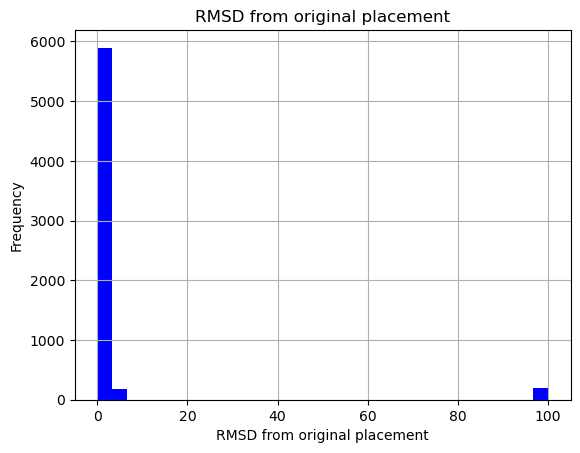

In [34]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('RMSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [35]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

6040

In [36]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.9630102040816326

In [37]:
systems_with_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
10706886,/data/project/thymelab/old_antagonist_results_pulldown/100/placements/4s0v_receptor_only_Z3472421949_4_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/Z3472421949/placements/4s0v_receptor_only_Z3472421949_1_1.pdb,-17.132893,-17.278465,0.145572,8.0,8.0,0.0,4.0,4.0,0.0,0.250000,0.375000,-0.125000,4,4,0.0,-2.719481,-2.853681,0.134200,100,100,0.0,0,0,0.0,0,0,0.0,96.397626,96.242854,0.154772,/data/project/thymelab/old_antagonist_results_pulldown/100/placements/4s0v_receptor_only_Z3472421949_4_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/100/placements/4s0v_receptor_only_Z3472421949_4_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/100/placements/4s0v_receptor_only_Z3472421949_4_0.pdb,0.112837,0.4,NaN,Z3472421949
10710626,/data/project/thymelab/old_antagonist_results_pulldown/100/placements/4s0v_receptor_only_Z3472421949_4_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/Z3472421949/placements/4s0v_receptor_only_Z3472421949_1_1.pdb,-18.526749,-17.278465,-1.248284,8.0,8.0,0.0,4.0,4.0,0.0,0.250000,0.375000,-0.125000,4,4,0.0,-3.237881,-2.853681,-0.384200,100,100,0.0,0,0,0.0,0,0,0.0,94.485370,96.242854,-1.757484,/data/project/thymelab/old_antagonist_results_pulldown/100/placements/4s0v_receptor_only_Z3472421949_4_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/100/placements/4s0v_receptor_only_Z3472421949_4_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/100/placements/4s0v_receptor_only_Z3472421949_4_1.pdb,0.217352,0.2,NaN,Z3472421949
5347227,/data/project/thymelab/old_antagonist_results_pulldown/10002/placements/4s0v_receptor_only_PV-005595072039_12_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-005595072039/placements/4s0v_receptor_only_PV-005595072039_4_3.pdb,-16.099654,-16.165954,0.066300,8.0,11.0,-3.0,4.0,5.0,-1.0,0.250000,0.090909,0.159091,0,1,-1.0,0.000000,-0.024036,0.024036,100,100,0.0,0,0,0.0,0,0,0.0,96.150346,100.900919,-4.750573,/data/project/thymelab/old_antagonist_results_pulldown/10002/placements/4s0v_receptor_only_PV-005595072039_12_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10002/placements/4s0v_receptor_only_PV-005595072039_12_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10002/placements/4s0v_receptor_only_PV-005595072039_12_0.pdb,3.703417,0.8,NaN,PV-005595072039
5360197,/data/project/thymelab/old_antagonist_results_pulldown/10005/placements/4s0v_receptor_only_PV-005597986868_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-005597986868/placements/4s0v_receptor_only_PV-005597986868_20_14.pdb,-16.219546,-16.093510,-0.126036,6.0,7.0,-1.0,2.0,2.0,0.0,0.333333,0.285714,0.047619,1,1,0.0,-2.408971,-2.297126,-0.111845,100,100,0.0,0,0,0.0,0,0,0.0,90.704816,91.895078,-1.190262,/data/project/thymelab/old_antagonist_results_pulldown/10005/placements/4s0v_receptor_only_PV-005597986868_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10005/placements/4s0v_receptor_only_PV-0055979

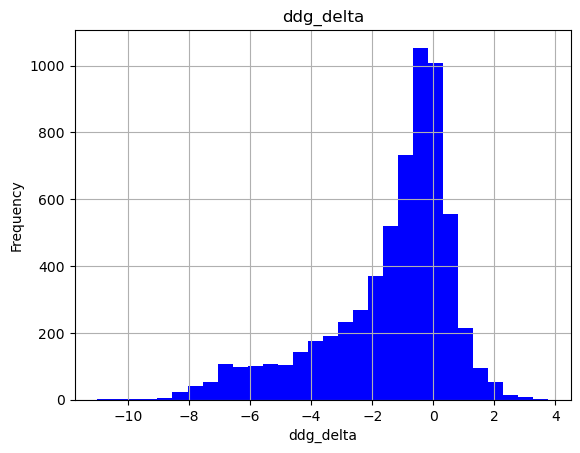

In [38]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [39]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

232

In [40]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.036989795918367346

In [41]:
systems_without_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
5392134,/data/project/thymelab/old_antagonist_results_pulldown/10025/placements/4s0v_receptor_only_PV-005614687577_7_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-005614687577/placements/4s0v_receptor_only_PV-005614687577_111_2.pdb,-16.687062,-9.318319,-7.368743,8.0,6.0,2.0,5.0,2.0,3.0,0.250000,0.333333,-0.083333,1,0,1.0,-0.302973,0.000000,-0.302973,100,100,0.0,0,0,0.0,0,0,0.0,97.259965,99.015014,-1.755049,/data/project/thymelab/old_antagonist_results_pulldown/10025/placements/4s0v_receptor_only_PV-005614687577_7_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10025/placements/4s0v_receptor_only_PV-005614687577_7_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10025/placements/4s0v_receptor_only_PV-005614687577_7_1.pdb,100.000000,0.2,NaN,PV-005614687577
5496148,/data/project/thymelab/old_antagonist_results_pulldown/10085/placements/4s0v_receptor_only_PV-005663969167_9_3.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-005663969167/placements/4s0v_receptor_only_PV-005663969167_128_1.pdb,-16.379374,-13.045118,-3.334256,8.0,7.0,1.0,4.0,2.0,2.0,0.250000,0.142857,0.107143,1,0,1.0,-1.020236,0.000000,-1.020236,100,100,0.0,0,0,0.0,0,0,0.0,95.850390,96.097739,-0.247349,/data/project/thymelab/old_antagonist_results_pulldown/10085/placements/4s0v_receptor_only_PV-005663969167_9_3.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10085/placements/4s0v_receptor_only_PV-005663969167_9_3.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10085/placements/4s0v_receptor_only_PV-005663969167_9_3.pdb,100.000000,0.0,NaN,PV-005663969167
5681523,/data/project/thymelab/old_antagonist_results_pulldown/10165/placements/4s0v_receptor_only_PV-005730654308_4_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-005730654308/placements/4s0v_receptor_only_PV-005730654308_197_7.pdb,-16.738211,-16.722896,-0.015315,9.0,8.0,1.0,6.0,4.0,2.0,0.333333,0.250000,0.083333,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,98.595122,95.527104,3.068018,/data/project/thymelab/old_antagonist_results_pulldown/10165/placements/4s0v_receptor_only_PV-005730654308_4_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10165/placements/4s0v_receptor_only_PV-005730654308_4_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10165/placements/4s0v_receptor_only_PV-005730654308_4_1.pdb,100.000000,0.0,NaN,PV-005730654308
5852097,/data/project/thymelab/old_antagonist_results_pulldown/10230/placements/4s0v_receptor_only_PV-005784404558_2_9.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-005784404558/placements/4s0v_receptor_only_PV-005784404558_213_0.pdb,-16.104927,-9.453227,-6.651700,7.0,7.0,0.0,4.0,2.0,2.0,0.285714,0.142857,0.142857,1,2,-1.0,-1.070531,-1.259696,0.189165,100,100,0.0,0,0,0.0,0,0,0.0,95.110256,100.429934,-5.319678,/data/project/thymelab/old_antagonist_results_pulldown/10230/placements/4s0v_receptor_only_PV-005784404558_2_9.pdb,/data/project/thymelab/old_antago

In [42]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
94048,/data/project/thymelab/old_antagonist_results_pulldown/11690/placements/4s0v_receptor_only_PV-000488001484_10_8.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000488001484/placements/4s0v_receptor_only_PV-000488001484_206_13.pdb,-16.332653,-16.575119,0.242466,8.0,9.0,-1.0,2.0,4.0,-2.0,0.250000,0.555556,-0.305556,0,1,-1.0,0.000000,-0.572282,0.572282,100,100,0.0,0,0,0.0,0,0,0.0,93.917347,97.408155,-3.490808,/data/project/thymelab/old_antagonist_results_pulldown/11690/placements/4s0v_receptor_only_PV-000488001484_10_8.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11690/placements/4s0v_receptor_only_PV-000488001484_10_8.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11690/placements/4s0v_receptor_only_PV-000488001484_10_8.pdb,4.714834,1.0,NaN,PV-000488001484
95684,/data/project/thymelab/old_antagonist_results_pulldown/11690/placements/4s0v_receptor_only_PV-000488001484_10_8.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000488001484/placements/4s0v_receptor_only_PV-000488001484_206_4.pdb,-16.332653,-17.727317,1.394664,8.0,9.0,-1.0,2.0,4.0,-2.0,0.250000,0.444444,-0.194444,0,1,-1.0,0.000000,-0.596478,0.596478,100,100,0.0,0,0,0.0,0,0,0.0,93.917347,96.120649,-2.203302,/data/project/thymelab/old_antagonist_results_pulldown/11690/placements/4s0v_receptor_only_PV-000488001484_10_8.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11690/placements/4s0v_receptor_only_PV-000488001484_10_8.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11690/placements/4s0v_receptor_only_PV-000488001484_10_8.pdb,4.730304,1.0,NaN,PV-000488001484
124672,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000508043638/placements/4s0v_receptor_only_PV-000508043638_195_13.pdb,-17.986575,-22.285324,4.298749,8.0,11.0,-3.0,5.0,6.0,-1.0,0.250000,0.363636,-0.113636,1,2,-1.0,-1.099647,-1.214026,0.114379,100,100,0.0,0,0,0.0,0,0,0.0,95.163778,95.864286,-0.700508,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,1.500018,1.0,NaN,PV-000508043638
135354,/data/project/thymelab/old_antagonist_results_pulldown/11857/placements/4s0v_receptor_only_PV-000511732407_2_8.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000511732407/placements/4s0v_receptor_only_PV-000511732407_215_9.pdb,-17.085777,-17.230830,0.145053,7.0,12.0,-5.0,3.0,5.0,-2.0,0.285714,0.500000,-0.214286,1,2,-1.0,-0.923830,-2.243008,1.319178,100,100,0.0,0,0,0.0,0,0,0.0,93.276107,100.026162,-6.750055,/data/project/thymelab/old_antagonist_results_pulldown/11857/placements/4s0v_receptor_only_PV-000511732407_2_8.pdb,/data/project/th

In [43]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
484,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000233746381/placements/4s0v_receptor_only_PV-000233746381_43_2.pdb,-17.546616,-18.766718,1.220102,8.0,11.0,-3.0,4.0,5.0,-1.0,0.250000,0.363636,-0.113636,1,1,0.0,-0.804754,-0.121093,-0.683661,100,100,0.0,0,0,0.0,0,0,0.0,94.898630,98.475825,-3.577195,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,1.783800,0.8,NaN,PV-000233746381
671,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000233746381/placements/4s0v_receptor_only_PV-000233746381_68_2.pdb,-17.546616,-19.554312,2.007696,8.0,11.0,-3.0,4.0,5.0,-1.0,0.250000,0.454545,-0.204545,1,1,0.0,-0.804754,-0.279703,-0.525051,100,100,0.0,0,0,0.0,0,0,0.0,94.898630,97.620530,-2.721900,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10358/placements/4s0v_receptor_only_PV-000233746381_15_0.pdb,1.725935,0.8,NaN,PV-000233746381
6607,/data/project/thymelab/old_antagonist_results_pulldown/3361/placements/4s0v_receptor_only_PV-000239618533_4_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000239618533/placements/4s0v_receptor_only_PV-000239618533_13_23.pdb,-16.792621,-17.056668,0.264047,8.0,9.0,-1.0,3.0,4.0,-1.0,0.250000,0.333333,-0.083333,1,1,0.0,-2.318741,-2.080631,-0.238110,100,100,0.0,0,0,0.0,0,0,0.0,93.138638,95.196034,-2.057396,/data/project/thymelab/old_antagonist_results_pulldown/3361/placements/4s0v_receptor_only_PV-000239618533_4_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/3361/placements/4s0v_receptor_only_PV-000239618533_4_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/3361/placements/4s0v_receptor_only_PV-000239618533_4_1.pdb,1.365167,0.8,NaN,PV-000239618533
7458,/data/project/thymelab/old_antagonist_results_pulldown/3361/placements/4s0v_receptor_only_PV-000239618533_4_10.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000239618533/placements/4s0v_receptor_only_PV-000239618533_13_23.pdb,-16.815084,-17.056668,0.241584,8.0,9.0,-1.0,3.0,4.0,-1.0,0.250000,0.333333,-0.083333,1,1,0.0,-2.441931,-2.080631,-0.361300,100,100,0.0,0,0,0.0,0,0,0.0,92.992985,95.196034,-2.203049,/data/project/thymelab/old_antagonist_results_pulldown/3361/placements/4s0v_receptor_only_PV-000239618533_4_10.pdb,/data/project/thymelab/old_antagoni

In [44]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 4) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -15) & (df_general['real_motif_ratio_compare'] >= 0.25)]
len(df_general_high_hbonds)


691

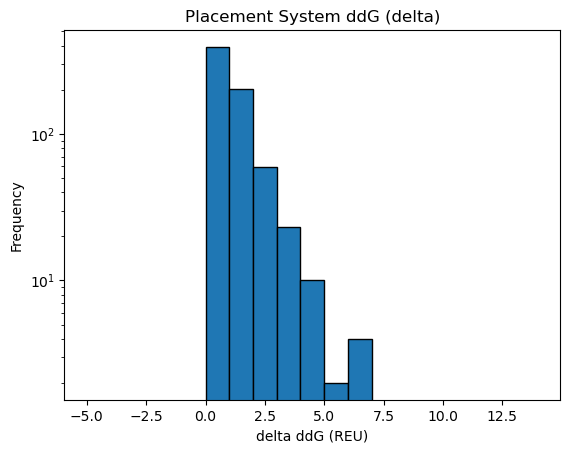

In [45]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-5, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

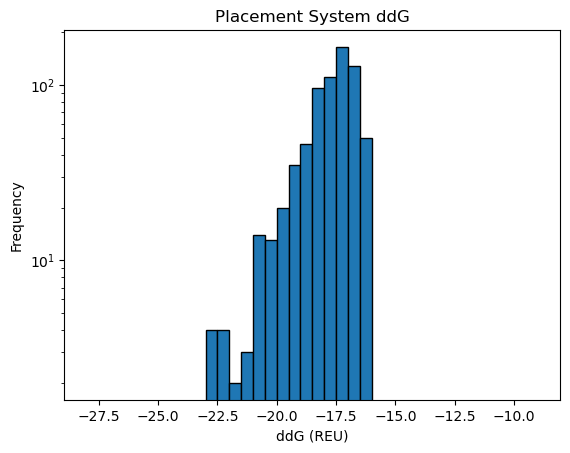

In [46]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

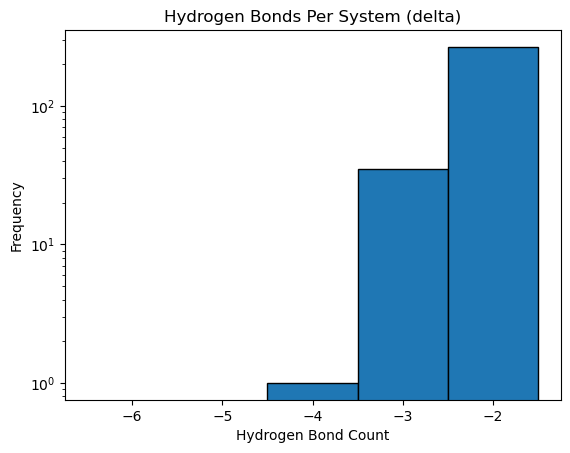

In [47]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-6.5, -0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

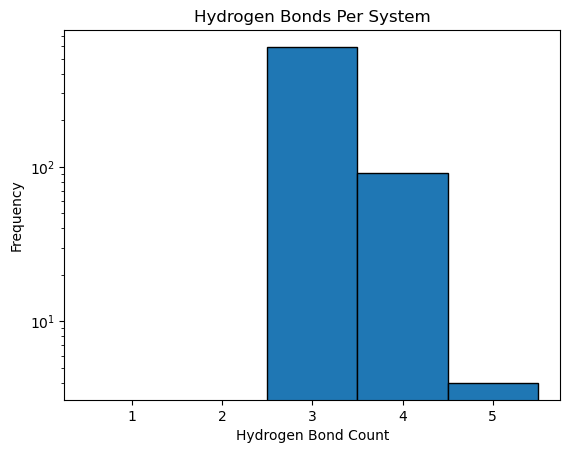

In [48]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.5, 6, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

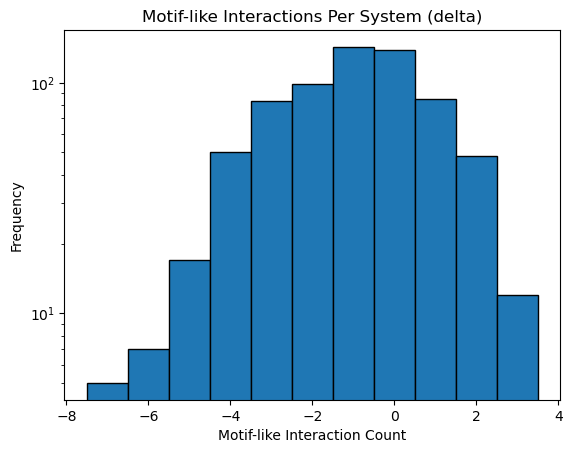

In [49]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

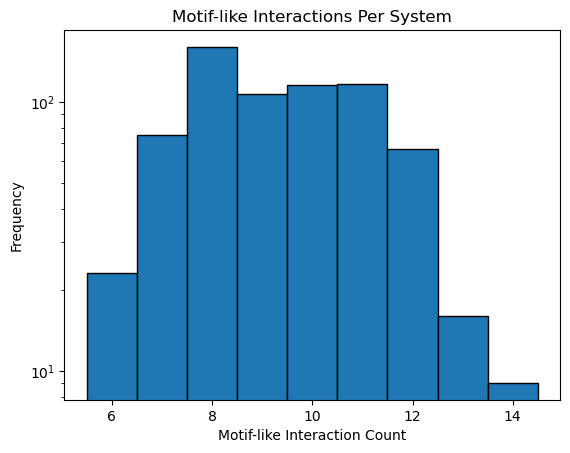

In [50]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

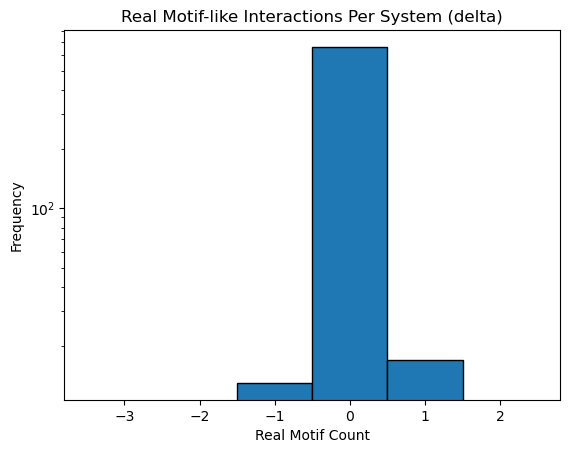

In [51]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta'] * df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-3.5, 3, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

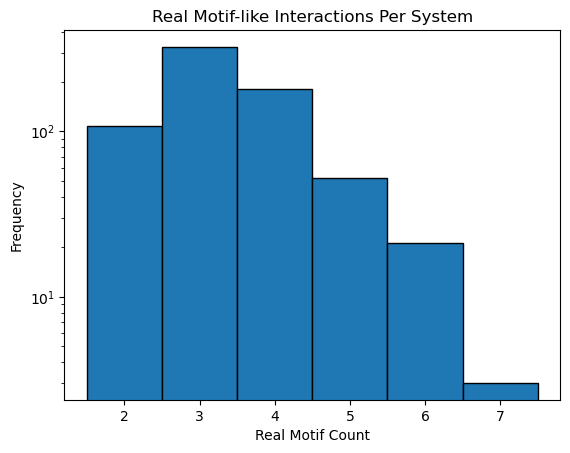

In [52]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare'] * df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

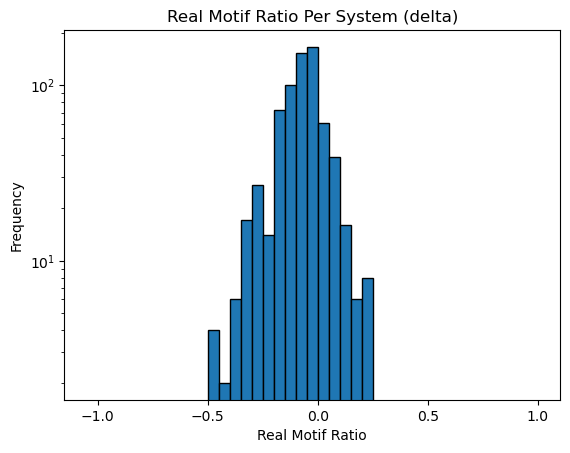

In [53]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

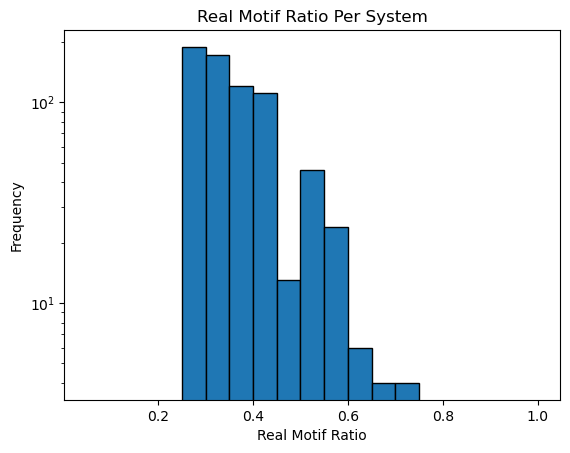

In [54]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

In [62]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
84772,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000420812175/placements/4s0v_receptor_only_PV-000420812175_33_4.pdb,-17.472476,-21.676692,4.204216,8.0,9.0,-1.0,4.0,3.0,1.0,0.375000,0.333333,0.041667,1,1,0.0,-0.455167,-0.974287,0.519120,100,100,0.0,0,0,0.0,0,0,0.0,95.447357,90.682354,4.765003,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,5.023053,0.4,NaN,PV-000420812175
86465,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_7.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000420812175/placements/4s0v_receptor_only_PV-000420812175_33_4.pdb,-17.573277,-21.676692,4.103415,8.0,9.0,-1.0,5.0,3.0,2.0,0.375000,0.333333,0.041667,1,1,0.0,-0.246891,-0.974287,0.727396,100,100,0.0,0,0,0.0,0,0,0.0,96.554832,90.682354,5.872478,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_7.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_7.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_7.pdb,4.934789,0.4,NaN,PV-000420812175
90445,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000456070651/placements/4s0v_receptor_only_PV-000456070651_120_8.pdb,-16.959269,-21.112428,4.153159,8.0,11.0,-3.0,4.0,1.0,3.0,0.250000,0.272727,-0.022727,0,1,-1.0,0.000000,-0.928978,0.928978,100,100,0.0,0,0,0.0,0,0,0.0,95.290731,91.231321,4.059410,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,4.052928,0.8,NaN,PV-000456070651
123758,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000508043638/placements/4s0v_receptor_only_PV-000508043638_195_18.pdb,-17.986575,-21.673842,3.687267,8.0,10.0,-2.0,5.0,5.0,0.0,0.250000,0.600000,-0.350000,1,2,-1.0,-1.099647,-0.962805,-0.136842,100,100,0.0,0,0,0.0,0,0,0.0,95.163778,94.963353,0.200425,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antago

In [63]:
len(df_general_filtered)

644

In [64]:
#filter the general so that it only has the lowest ddg for each ligand
df_filtered = df_general_filtered.loc[df_general_filtered.groupby("ligand_name")["ddg_compare"].idxmin()]
df_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
84772,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000420812175/placements/4s0v_receptor_only_PV-000420812175_33_4.pdb,-17.472476,-21.676692,4.204216,8.0,9.0,-1.0,4.0,3.0,1.0,0.375000,0.333333,0.041667,1,1,0.0,-0.455167,-0.974287,0.519120,100,100,0.0,0,0,0.0,0,0,0.0,95.447357,90.682354,4.765003,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11758/placements/4s0v_receptor_only_PV-000420812175_10_1.pdb,5.023053,0.4,NaN,PV-000420812175
90445,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000456070651/placements/4s0v_receptor_only_PV-000456070651_120_8.pdb,-16.959269,-21.112428,4.153159,8.0,11.0,-3.0,4.0,1.0,3.0,0.250000,0.272727,-0.022727,0,1,-1.0,0.000000,-0.928978,0.928978,100,100,0.0,0,0,0.0,0,0,0.0,95.290731,91.231321,4.059410,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/11922/placements/4s0v_receptor_only_PV-000456070651_7_0.pdb,4.052928,0.8,NaN,PV-000456070651
124672,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000508043638/placements/4s0v_receptor_only_PV-000508043638_195_13.pdb,-17.986575,-22.285324,4.298749,8.0,11.0,-3.0,5.0,6.0,-1.0,0.250000,0.363636,-0.113636,1,2,-1.0,-1.099647,-1.214026,0.114379,100,100,0.0,0,0,0.0,0,0,0.0,95.163778,95.864286,-0.700508,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,/data/project/thymelab/old_antagonist_results_pulldown/10802/placements/4s0v_receptor_only_PV-000508043638_10_6.pdb,1.500018,1.0,NaN,PV-000508043638
147847,/data/project/thymelab/old_antagonist_results_pulldown/11929/placements/4s0v_receptor_only_PV-000547532402_11_0.pdb,/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/PV-000547532402/placements/4s0v_receptor_only_PV-000547532402_2_4.pdb,-17.657140,-21.225189,3.568049,10.0,12.0,-2.0,4.0,3.0,1.0,0.300000,0.333333,-0.033333,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,96.642860,94.108144,2.534716,/data/project/thymelab/old_antagonist_results_pulldown/11929/placements/4s0v_receptor_only_PV-000547532402_11_0.pdb,/data/project/thymelab/old_anta

In [65]:
# Extract ligand names using a regular expression
df_filtered['ligand_name'] = df_filtered['file_compare'].str.extract(r'4s0v_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_filtered['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-000420812175' 'PV-000456070651' 'PV-000508043638' 'PV-000547532402'
 'PV-000555165030' 'PV-001050225755' 'PV-001050751456' 'PV-001189669321'
 'PV-001468752599' 'PV-001598992462' 'PV-001609697280' 'PV-001644884084'
 'PV-002439306484' 'PV-002561784366' 'PV-002590617981' 'PV-002832756617'
 'PV-002966702929' 'PV-003420743347' 'PV-003506710198' 'PV-003686026694'
 'PV-003790498879' 'PV-003891999816' 'PV-003981518553' 'PV-004012729991'
 'PV-004044320620' 'PV-004060263542' 'PV-004068589738' 'PV-004079348959'
 'PV-004097042654' 'PV-004183564268' 'PV-004198554362' 'PV-004219750140'
 'PV-004302343285' 'PV-004318818801' 'PV-004324237239' 'PV-004328342538'
 'PV-004355964549' 'PV-004438161297' 'PV-004449135139' 'PV-004452271513'
 'PV-004498496766' 'PV-004538332691' 'PV-004552529528' 'PV-004567046420'
 'PV-004577138058' 'PV-004588813124' 'PV-004601177183' 'PV-004613023399'
 'PV-004631170743' 'PV-004662399391' 'PV-004667420170' 'PV-004684297901'
 'PV-004690238766' 'PV-0047146

In [66]:
"""
for i in df_general_high_hbonds['file_initial']:
    #print(i['file_initial'], i['file_compare'])
    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")
"""

'\nfor i in df_general_high_hbonds[\'file_initial\']:\n    #print(i[\'file_initial\'], i[\'file_compare\'])\n    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")\n'

In [67]:
line_counter = 0
folder_counter = 0

destination = "/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/"
if destination.endswith("/") == False:
    destination = destination + "/"

for index, row in df_filtered.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir " + destination + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " " + destination + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " " + destination + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 50 == 0:
        folder_counter = folder_counter + 1
        
#write the df_general_high_hbonds to csv
df_filtered.to_csv(destination + 'antagonist_redo_minimal_hbonds_quarter_real_best_improved_placements_sheet.csv', index=False)

00000_initial_4s0v_receptor_only_PV-000420812175_10_1.pdb 00000_compare_4s0v_receptor_only_PV-000420812175_33_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00001_initial_4s0v_receptor_only_PV-000456070651_7_0.pdb 00001_compare_4s0v_receptor_only_PV-000456070651_120_8.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00002_initial_4s0v_receptor_only_PV-000508043638_10_6.pdb 00002_compare_4s0v_receptor_only_PV-000508043638_195_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00003_initial_4s0v_receptor_only_PV-000547532402_11_0.pdb 00003_compare_4s0v_receptor_only_PV-000547532402_2_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00004_initial_4s0v_receptor_only_PV-000555165030_5_0.pdb 00004_compare_4s0v_receptor_only_PV-000555165030_17_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00005_initial_4s0v_receptor_only_PV-001050225755_10_1.pdb 00005_compare_4s0v_receptor_only_PV-001050225755_56_50.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00006_initial_4s0v_receptor_only_PV-001050751456_9_2.pdb 00006_compare_4s0v_receptor_only_PV-001050751456_80_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00007_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00007_compare_4s0v_receptor_only_PV-001189669321_2_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00008_initial_4s0v_receptor_only_PV-001468752599_9_1.pdb 00008_compare_4s0v_receptor_only_PV-001468752599_79_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00009_initial_4s0v_receptor_only_PV-001598992462_6_5.pdb 00009_compare_4s0v_receptor_only_PV-001598992462_67_32.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00010_initial_4s0v_receptor_only_PV-001609697280_11_1.pdb 00010_compare_4s0v_receptor_only_PV-001609697280_40_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00011_initial_4s0v_receptor_only_PV-001644884084_2_4.pdb 00011_compare_4s0v_receptor_only_PV-001644884084_121_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00012_initial_4s0v_receptor_only_PV-002439306484_5_15.pdb 00012_compare_4s0v_receptor_only_PV-002439306484_70_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00013_initial_4s0v_receptor_only_PV-002561784366_5_24.pdb 00013_compare_4s0v_receptor_only_PV-002561784366_161_30.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00014_initial_4s0v_receptor_only_PV-002590617981_10_23.pdb 00014_compare_4s0v_receptor_only_PV-002590617981_28_19.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00015_initial_4s0v_receptor_only_PV-002832756617_9_9.pdb 00015_compare_4s0v_receptor_only_PV-002832756617_31_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00016_initial_4s0v_receptor_only_PV-002966702929_9_19.pdb 00016_compare_4s0v_receptor_only_PV-002966702929_162_24.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00017_initial_4s0v_receptor_only_PV-003420743347_2_9.pdb 00017_compare_4s0v_receptor_only_PV-003420743347_21_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00018_initial_4s0v_receptor_only_PV-003506710198_2_3.pdb 00018_compare_4s0v_receptor_only_PV-003506710198_73_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00019_initial_4s0v_receptor_only_PV-003686026694_4_7.pdb 00019_compare_4s0v_receptor_only_PV-003686026694_196_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00020_initial_4s0v_receptor_only_PV-003790498879_10_6.pdb 00020_compare_4s0v_receptor_only_PV-003790498879_179_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00021_initial_4s0v_receptor_only_PV-003891999816_1_1.pdb 00021_compare_4s0v_receptor_only_PV-003891999816_146_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00022_initial_4s0v_receptor_only_PV-003981518553_4_1.pdb 00022_compare_4s0v_receptor_only_PV-003981518553_82_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00023_initial_4s0v_receptor_only_PV-004012729991_1_0.pdb 00023_compare_4s0v_receptor_only_PV-004012729991_110_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00024_initial_4s0v_receptor_only_PV-004044320620_12_0.pdb 00024_compare_4s0v_receptor_only_PV-004044320620_90_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00025_initial_4s0v_receptor_only_PV-004060263542_6_10.pdb 00025_compare_4s0v_receptor_only_PV-004060263542_196_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00026_initial_4s0v_receptor_only_PV-004068589738_13_0.pdb 00026_compare_4s0v_receptor_only_PV-004068589738_41_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00027_initial_4s0v_receptor_only_PV-004079348959_9_2.pdb 00027_compare_4s0v_receptor_only_PV-004079348959_9_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00028_initial_4s0v_receptor_only_PV-004097042654_12_3.pdb 00028_compare_4s0v_receptor_only_PV-004097042654_7_43.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00029_initial_4s0v_receptor_only_PV-004183564268_1_2.pdb 00029_compare_4s0v_receptor_only_PV-004183564268_13_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00030_initial_4s0v_receptor_only_PV-004198554362_6_1.pdb 00030_compare_4s0v_receptor_only_PV-004198554362_141_11.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00031_initial_4s0v_receptor_only_PV-004219750140_4_1.pdb 00031_compare_4s0v_receptor_only_PV-004219750140_90_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00032_initial_4s0v_receptor_only_PV-004302343285_11_5.pdb 00032_compare_4s0v_receptor_only_PV-004302343285_88_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00033_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00033_compare_4s0v_receptor_only_PV-004318818801_117_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00034_initial_4s0v_receptor_only_PV-004324237239_9_4.pdb 00034_compare_4s0v_receptor_only_PV-004324237239_140_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00035_initial_4s0v_receptor_only_PV-004328342538_7_1.pdb 00035_compare_4s0v_receptor_only_PV-004328342538_47_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00036_initial_4s0v_receptor_only_PV-004355964549_5_0.pdb 00036_compare_4s0v_receptor_only_PV-004355964549_197_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00037_initial_4s0v_receptor_only_PV-004438161297_2_0.pdb 00037_compare_4s0v_receptor_only_PV-004438161297_41_25.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00038_initial_4s0v_receptor_only_PV-004449135139_4_0.pdb 00038_compare_4s0v_receptor_only_PV-004449135139_177_18.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00039_initial_4s0v_receptor_only_PV-004452271513_2_1.pdb 00039_compare_4s0v_receptor_only_PV-004452271513_49_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00040_initial_4s0v_receptor_only_PV-004498496766_4_0.pdb 00040_compare_4s0v_receptor_only_PV-004498496766_113_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00041_initial_4s0v_receptor_only_PV-004538332691_3_1.pdb 00041_compare_4s0v_receptor_only_PV-004538332691_24_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00042_initial_4s0v_receptor_only_PV-004552529528_4_0.pdb 00042_compare_4s0v_receptor_only_PV-004552529528_119_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00043_initial_4s0v_receptor_only_PV-004567046420_15_1.pdb 00043_compare_4s0v_receptor_only_PV-004567046420_51_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00044_initial_4s0v_receptor_only_PV-004577138058_6_3.pdb 00044_compare_4s0v_receptor_only_PV-004577138058_17_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00045_initial_4s0v_receptor_only_PV-004588813124_5_1.pdb 00045_compare_4s0v_receptor_only_PV-004588813124_35_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00046_initial_4s0v_receptor_only_PV-004601177183_7_4.pdb 00046_compare_4s0v_receptor_only_PV-004601177183_53_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00047_initial_4s0v_receptor_only_PV-004613023399_3_1.pdb 00047_compare_4s0v_receptor_only_PV-004613023399_189_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00048_initial_4s0v_receptor_only_PV-004631170743_7_10.pdb 00048_compare_4s0v_receptor_only_PV-004631170743_162_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00049_initial_4s0v_receptor_only_PV-004662399391_7_4.pdb 00049_compare_4s0v_receptor_only_PV-004662399391_162_6.pdb
00050_initial_4s0v_receptor_only_PV-004667420170_3_0.pdb 00050_compare_4s0v_receptor_only_PV-004667420170_46_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00051_initial_4s0v_receptor_only_PV-004684297901_7_3.pdb 00051_compare_4s0v_receptor_only_PV-004684297901_225_8.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00052_initial_4s0v_receptor_only_PV-004690238766_13_1.pdb 00052_compare_4s0v_receptor_only_PV-004690238766_51_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00053_initial_4s0v_receptor_only_PV-004714696678_7_3.pdb 00053_compare_4s0v_receptor_only_PV-004714696678_147_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00054_initial_4s0v_receptor_only_PV-004789815218_13_1.pdb 00054_compare_4s0v_receptor_only_PV-004789815218_26_16.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00055_initial_4s0v_receptor_only_PV-004833602568_9_3.pdb 00055_compare_4s0v_receptor_only_PV-004833602568_104_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00056_initial_4s0v_receptor_only_PV-004867480706_1_0.pdb 00056_compare_4s0v_receptor_only_PV-004867480706_22_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00057_initial_4s0v_receptor_only_PV-004877339413_8_7.pdb 00057_compare_4s0v_receptor_only_PV-004877339413_193_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00058_initial_4s0v_receptor_only_PV-004877339415_2_6.pdb 00058_compare_4s0v_receptor_only_PV-004877339415_193_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00059_initial_4s0v_receptor_only_PV-004879275413_9_4.pdb 00059_compare_4s0v_receptor_only_PV-004879275413_77_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00060_initial_4s0v_receptor_only_PV-004889546655_6_11.pdb 00060_compare_4s0v_receptor_only_PV-004889546655_12_19.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00061_initial_4s0v_receptor_only_PV-004897062647_6_2.pdb 00061_compare_4s0v_receptor_only_PV-004897062647_23_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00062_initial_4s0v_receptor_only_PV-004945794382_11_8.pdb 00062_compare_4s0v_receptor_only_PV-004945794382_141_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00063_initial_4s0v_receptor_only_PV-004951591092_14_7.pdb 00063_compare_4s0v_receptor_only_PV-004951591092_199_14.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00064_initial_4s0v_receptor_only_PV-004960239399_13_1.pdb 00064_compare_4s0v_receptor_only_PV-004960239399_90_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00065_initial_4s0v_receptor_only_PV-004971977868_14_0.pdb 00065_compare_4s0v_receptor_only_PV-004971977868_102_12.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00066_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00066_compare_4s0v_receptor_only_PV-004979785411_8_11.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00067_initial_4s0v_receptor_only_PV-005012539135_12_18.pdb 00067_compare_4s0v_receptor_only_PV-005012539135_154_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00068_initial_4s0v_receptor_only_PV-005018239219_5_0.pdb 00068_compare_4s0v_receptor_only_PV-005018239219_140_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00069_initial_4s0v_receptor_only_PV-005025003567_9_0.pdb 00069_compare_4s0v_receptor_only_PV-005025003567_104_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00070_initial_4s0v_receptor_only_PV-005033320265_9_1.pdb 00070_compare_4s0v_receptor_only_PV-005033320265_27_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00071_initial_4s0v_receptor_only_PV-005068406776_6_1.pdb 00071_compare_4s0v_receptor_only_PV-005068406776_46_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00072_initial_4s0v_receptor_only_PV-005084517349_2_3.pdb 00072_compare_4s0v_receptor_only_PV-005084517349_12_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00073_initial_4s0v_receptor_only_PV-005108701996_4_0.pdb 00073_compare_4s0v_receptor_only_PV-005108701996_171_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00074_initial_4s0v_receptor_only_PV-005119440667_8_6.pdb 00074_compare_4s0v_receptor_only_PV-005119440667_7_26.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00075_initial_4s0v_receptor_only_PV-005164998145_7_0.pdb 00075_compare_4s0v_receptor_only_PV-005164998145_112_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00076_initial_4s0v_receptor_only_PV-005174248484_1_2.pdb 00076_compare_4s0v_receptor_only_PV-005174248484_49_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00077_initial_4s0v_receptor_only_PV-005180721433_15_0.pdb 00077_compare_4s0v_receptor_only_PV-005180721433_81_11.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00078_initial_4s0v_receptor_only_PV-005215976254_7_6.pdb 00078_compare_4s0v_receptor_only_PV-005215976254_77_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00079_initial_4s0v_receptor_only_PV-005246902658_11_1.pdb 00079_compare_4s0v_receptor_only_PV-005246902658_108_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00080_initial_4s0v_receptor_only_PV-005291248900_12_4.pdb 00080_compare_4s0v_receptor_only_PV-005291248900_12_11.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00081_initial_4s0v_receptor_only_PV-005291248901_6_6.pdb 00081_compare_4s0v_receptor_only_PV-005291248901_12_11.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00082_initial_4s0v_receptor_only_PV-005292489104_6_1.pdb 00082_compare_4s0v_receptor_only_PV-005292489104_108_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00083_initial_4s0v_receptor_only_PV-005312249906_3_2.pdb 00083_compare_4s0v_receptor_only_PV-005312249906_189_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00084_initial_4s0v_receptor_only_PV-005315673504_6_0.pdb 00084_compare_4s0v_receptor_only_PV-005315673504_127_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00085_initial_4s0v_receptor_only_PV-005336238550_2_0.pdb 00085_compare_4s0v_receptor_only_PV-005336238550_75_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00086_initial_4s0v_receptor_only_PV-005338170586_9_7.pdb 00086_compare_4s0v_receptor_only_PV-005338170586_17_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00087_initial_4s0v_receptor_only_PV-005338170587_12_6.pdb 00087_compare_4s0v_receptor_only_PV-005338170587_17_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00088_initial_4s0v_receptor_only_PV-005356454072_7_4.pdb 00088_compare_4s0v_receptor_only_PV-005356454072_66_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00089_initial_4s0v_receptor_only_PV-005358133610_11_1.pdb 00089_compare_4s0v_receptor_only_PV-005358133610_106_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00090_initial_4s0v_receptor_only_PV-005366449426_9_2.pdb 00090_compare_4s0v_receptor_only_PV-005366449426_99_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00091_initial_4s0v_receptor_only_PV-005372307597_12_1.pdb 00091_compare_4s0v_receptor_only_PV-005372307597_167_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00092_initial_4s0v_receptor_only_PV-005435353687_4_7.pdb 00092_compare_4s0v_receptor_only_PV-005435353687_194_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00093_initial_4s0v_receptor_only_PV-005465554458_8_0.pdb 00093_compare_4s0v_receptor_only_PV-005465554458_101_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00094_initial_4s0v_receptor_only_PV-005490587837_5_6.pdb 00094_compare_4s0v_receptor_only_PV-005490587837_29_28.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00095_initial_4s0v_receptor_only_PV-005521996330_7_0.pdb 00095_compare_4s0v_receptor_only_PV-005521996330_23_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00096_initial_4s0v_receptor_only_PV-005559371916_4_0.pdb 00096_compare_4s0v_receptor_only_PV-005559371916_79_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00097_initial_4s0v_receptor_only_PV-005571674967_2_3.pdb 00097_compare_4s0v_receptor_only_PV-005571674967_74_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00098_initial_4s0v_receptor_only_PV-005591176260_5_4.pdb 00098_compare_4s0v_receptor_only_PV-005591176260_36_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/1’: File exists


00099_initial_4s0v_receptor_only_PV-005597986868_15_11.pdb 00099_compare_4s0v_receptor_only_PV-005597986868_143_6.pdb
00100_initial_4s0v_receptor_only_PV-005628331579_10_3.pdb 00100_compare_4s0v_receptor_only_PV-005628331579_71_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00101_initial_4s0v_receptor_only_PV-005652489015_11_2.pdb 00101_compare_4s0v_receptor_only_PV-005652489015_87_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00102_initial_4s0v_receptor_only_PV-005675945038_5_13.pdb 00102_compare_4s0v_receptor_only_PV-005675945038_93_18.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00103_initial_4s0v_receptor_only_PV-005704166968_2_3.pdb 00103_compare_4s0v_receptor_only_PV-005704166968_35_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00104_initial_4s0v_receptor_only_PV-005717096416_11_0.pdb 00104_compare_4s0v_receptor_only_PV-005717096416_107_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00105_initial_4s0v_receptor_only_PV-005731236048_8_1.pdb 00105_compare_4s0v_receptor_only_PV-005731236048_148_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00106_initial_4s0v_receptor_only_PV-005750882572_2_0.pdb 00106_compare_4s0v_receptor_only_PV-005750882572_147_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00107_initial_4s0v_receptor_only_PV-005781914269_7_1.pdb 00107_compare_4s0v_receptor_only_PV-005781914269_34_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00108_initial_4s0v_receptor_only_PV-005784575655_14_1.pdb 00108_compare_4s0v_receptor_only_PV-005784575655_65_20.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00109_initial_4s0v_receptor_only_PV-005806446994_4_0.pdb 00109_compare_4s0v_receptor_only_PV-005806446994_139_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00110_initial_4s0v_receptor_only_PV-005806969933_5_1.pdb 00110_compare_4s0v_receptor_only_PV-005806969933_17_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00111_initial_4s0v_receptor_only_PV-005882014749_7_0.pdb 00111_compare_4s0v_receptor_only_PV-005882014749_38_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00112_initial_4s0v_receptor_only_PV-005890043277_6_0.pdb 00112_compare_4s0v_receptor_only_PV-005890043277_57_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00113_initial_4s0v_receptor_only_PV-005903115669_6_4.pdb 00113_compare_4s0v_receptor_only_PV-005903115669_53_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00114_initial_4s0v_receptor_only_PV-005903911043_6_0.pdb 00114_compare_4s0v_receptor_only_PV-005903911043_57_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00115_initial_4s0v_receptor_only_PV-005913371944_10_12.pdb 00115_compare_4s0v_receptor_only_PV-005913371944_199_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00116_initial_4s0v_receptor_only_PV-005927840694_3_2.pdb 00116_compare_4s0v_receptor_only_PV-005927840694_34_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00117_initial_4s0v_receptor_only_PV-005939106974_5_0.pdb 00117_compare_4s0v_receptor_only_PV-005939106974_85_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00118_initial_4s0v_receptor_only_PV-005948980875_1_9.pdb 00118_compare_4s0v_receptor_only_PV-005948980875_12_20.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00119_initial_4s0v_receptor_only_PV-005973082462_1_1.pdb 00119_compare_4s0v_receptor_only_PV-005973082462_32_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00120_initial_4s0v_receptor_only_PV-005980046069_10_9.pdb 00120_compare_4s0v_receptor_only_PV-005980046069_119_51.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00121_initial_4s0v_receptor_only_PV-005999894167_12_17.pdb 00121_compare_4s0v_receptor_only_PV-005999894167_112_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00122_initial_4s0v_receptor_only_PV-006013774905_5_0.pdb 00122_compare_4s0v_receptor_only_PV-006013774905_107_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00123_initial_4s0v_receptor_only_PV-006038231288_3_3.pdb 00123_compare_4s0v_receptor_only_PV-006038231288_91_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00124_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00124_compare_4s0v_receptor_only_PV-006045228088_13_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00125_initial_4s0v_receptor_only_PV-006048244946_6_1.pdb 00125_compare_4s0v_receptor_only_PV-006048244946_236_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00126_initial_4s0v_receptor_only_PV-006051209610_2_1.pdb 00126_compare_4s0v_receptor_only_PV-006051209610_89_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00127_initial_4s0v_receptor_only_PV-006051979912_9_6.pdb 00127_compare_4s0v_receptor_only_PV-006051979912_74_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00128_initial_4s0v_receptor_only_PV-006070315027_9_4.pdb 00128_compare_4s0v_receptor_only_PV-006070315027_152_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00129_initial_4s0v_receptor_only_PV-006072013363_6_1.pdb 00129_compare_4s0v_receptor_only_PV-006072013363_18_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00130_initial_4s0v_receptor_only_PV-006091949762_2_3.pdb 00130_compare_4s0v_receptor_only_PV-006091949762_142_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00131_initial_4s0v_receptor_only_PV-006092380295_1_2.pdb 00131_compare_4s0v_receptor_only_PV-006092380295_148_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00132_initial_4s0v_receptor_only_PV-006106297993_1_1.pdb 00132_compare_4s0v_receptor_only_PV-006106297993_10_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00133_initial_4s0v_receptor_only_PV-006123760917_2_3.pdb 00133_compare_4s0v_receptor_only_PV-006123760917_10_17.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00134_initial_4s0v_receptor_only_PV-006129629125_1_0.pdb 00134_compare_4s0v_receptor_only_PV-006129629125_82_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00135_initial_4s0v_receptor_only_PV-006140569739_4_0.pdb 00135_compare_4s0v_receptor_only_PV-006140569739_176_8.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00136_initial_4s0v_receptor_only_PV-006193150459_4_3.pdb 00136_compare_4s0v_receptor_only_PV-006193150459_162_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00137_initial_4s0v_receptor_only_PV-006221063761_7_2.pdb 00137_compare_4s0v_receptor_only_PV-006221063761_26_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00138_initial_4s0v_receptor_only_PV-006230618569_7_0.pdb 00138_compare_4s0v_receptor_only_PV-006230618569_21_8.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00139_initial_4s0v_receptor_only_PV-006230618570_6_0.pdb 00139_compare_4s0v_receptor_only_PV-006230618570_21_8.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00140_initial_4s0v_receptor_only_PV-006248629770_2_5.pdb 00140_compare_4s0v_receptor_only_PV-006248629770_138_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00141_initial_4s0v_receptor_only_PV-006292116928_9_2.pdb 00141_compare_4s0v_receptor_only_PV-006292116928_13_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00142_initial_4s0v_receptor_only_PV-006296936625_13_1.pdb 00142_compare_4s0v_receptor_only_PV-006296936625_199_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00143_initial_4s0v_receptor_only_PV-006306104820_12_1.pdb 00143_compare_4s0v_receptor_only_PV-006306104820_205_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00144_initial_4s0v_receptor_only_PV-006355804443_12_4.pdb 00144_compare_4s0v_receptor_only_PV-006355804443_16_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00145_initial_4s0v_receptor_only_PV-006362636966_3_0.pdb 00145_compare_4s0v_receptor_only_PV-006362636966_112_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00146_initial_4s0v_receptor_only_PV-006369565206_7_0.pdb 00146_compare_4s0v_receptor_only_PV-006369565206_23_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00147_initial_4s0v_receptor_only_PV-006407899132_5_0.pdb 00147_compare_4s0v_receptor_only_PV-006407899132_140_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00148_initial_4s0v_receptor_only_PV-006411962077_4_2.pdb 00148_compare_4s0v_receptor_only_PV-006411962077_123_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/2’: File exists


00149_initial_4s0v_receptor_only_PV-006422787881_5_7.pdb 00149_compare_4s0v_receptor_only_PV-006422787881_114_0.pdb
00150_initial_4s0v_receptor_only_PV-006426988921_6_5.pdb 00150_compare_4s0v_receptor_only_PV-006426988921_42_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00151_initial_4s0v_receptor_only_PV-006455688136_6_1.pdb 00151_compare_4s0v_receptor_only_PV-006455688136_71_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00152_initial_4s0v_receptor_only_PV-006458198275_10_0.pdb 00152_compare_4s0v_receptor_only_PV-006458198275_199_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00153_initial_4s0v_receptor_only_PV-006462230598_11_5.pdb 00153_compare_4s0v_receptor_only_PV-006462230598_184_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00154_initial_4s0v_receptor_only_PV-006463011136_1_2.pdb 00154_compare_4s0v_receptor_only_PV-006463011136_31_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00155_initial_4s0v_receptor_only_PV-006493720891_12_0.pdb 00155_compare_4s0v_receptor_only_PV-006493720891_10_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00156_initial_4s0v_receptor_only_PV-006496738849_9_3.pdb 00156_compare_4s0v_receptor_only_PV-006496738849_67_12.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00157_initial_4s0v_receptor_only_PV-006508401460_8_8.pdb 00157_compare_4s0v_receptor_only_PV-006508401460_105_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00158_initial_4s0v_receptor_only_PV-006508401461_10_1.pdb 00158_compare_4s0v_receptor_only_PV-006508401461_105_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00159_initial_4s0v_receptor_only_PV-006517426018_5_6.pdb 00159_compare_4s0v_receptor_only_PV-006517426018_94_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00160_initial_4s0v_receptor_only_PV-006519962492_11_1.pdb 00160_compare_4s0v_receptor_only_PV-006519962492_175_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00161_initial_4s0v_receptor_only_PV-006533735312_10_1.pdb 00161_compare_4s0v_receptor_only_PV-006533735312_34_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00162_initial_4s0v_receptor_only_PV-006560938034_8_0.pdb 00162_compare_4s0v_receptor_only_PV-006560938034_125_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00163_initial_4s0v_receptor_only_PV-006566517739_2_0.pdb 00163_compare_4s0v_receptor_only_PV-006566517739_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00164_initial_4s0v_receptor_only_PV-006581773495_7_5.pdb 00164_compare_4s0v_receptor_only_PV-006581773495_220_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00165_initial_4s0v_receptor_only_PV-006583584105_4_0.pdb 00165_compare_4s0v_receptor_only_PV-006583584105_84_12.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00166_initial_4s0v_receptor_only_PV-006586410710_11_0.pdb 00166_compare_4s0v_receptor_only_PV-006586410710_90_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00167_initial_4s0v_receptor_only_PV-006601436210_11_5.pdb 00167_compare_4s0v_receptor_only_PV-006601436210_102_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00168_initial_4s0v_receptor_only_PV-006614770816_11_2.pdb 00168_compare_4s0v_receptor_only_PV-006614770816_204_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00169_initial_4s0v_receptor_only_PV-006633667198_10_1.pdb 00169_compare_4s0v_receptor_only_PV-006633667198_164_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00170_initial_4s0v_receptor_only_PV-006636734532_3_2.pdb 00170_compare_4s0v_receptor_only_PV-006636734532_105_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00171_initial_4s0v_receptor_only_PV-006636734533_10_2.pdb 00171_compare_4s0v_receptor_only_PV-006636734533_105_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00172_initial_4s0v_receptor_only_PV-006638249575_3_6.pdb 00172_compare_4s0v_receptor_only_PV-006638249575_49_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00173_initial_4s0v_receptor_only_PV-006667495042_3_7.pdb 00173_compare_4s0v_receptor_only_PV-006667495042_178_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00174_initial_4s0v_receptor_only_PV-006680048776_7_1.pdb 00174_compare_4s0v_receptor_only_PV-006680048776_182_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00175_initial_4s0v_receptor_only_PV-006702233730_7_4.pdb 00175_compare_4s0v_receptor_only_PV-006702233730_168_19.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00176_initial_4s0v_receptor_only_Z1123945327_9_0.pdb 00176_compare_4s0v_receptor_only_Z1123945327_144_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00177_initial_4s0v_receptor_only_Z1141296323_5_8.pdb 00177_compare_4s0v_receptor_only_Z1141296323_27_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00178_initial_4s0v_receptor_only_Z1154910254_5_5.pdb 00178_compare_4s0v_receptor_only_Z1154910254_110_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00179_initial_4s0v_receptor_only_Z1165242680_1_0.pdb 00179_compare_4s0v_receptor_only_Z1165242680_52_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00180_initial_4s0v_receptor_only_Z1267098794_12_3.pdb 00180_compare_4s0v_receptor_only_Z1267098794_167_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00181_initial_4s0v_receptor_only_Z1312379811_13_0.pdb 00181_compare_4s0v_receptor_only_Z1312379811_92_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00182_initial_4s0v_receptor_only_Z1393238519_12_1.pdb 00182_compare_4s0v_receptor_only_Z1393238519_155_8.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00183_initial_4s0v_receptor_only_Z1488536351_8_2.pdb 00183_compare_4s0v_receptor_only_Z1488536351_93_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00184_initial_4s0v_receptor_only_Z1496726386_11_3.pdb 00184_compare_4s0v_receptor_only_Z1496726386_173_43.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00185_initial_4s0v_receptor_only_Z1541820049_6_14.pdb 00185_compare_4s0v_receptor_only_Z1541820049_33_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00186_initial_4s0v_receptor_only_Z1595715753_10_51.pdb 00186_compare_4s0v_receptor_only_Z1595715753_79_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00187_initial_4s0v_receptor_only_Z1616617389_5_3.pdb 00187_compare_4s0v_receptor_only_Z1616617389_43_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00188_initial_4s0v_receptor_only_Z1639881549_13_15.pdb 00188_compare_4s0v_receptor_only_Z1639881549_124_28.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00189_initial_4s0v_receptor_only_Z1839636644_8_5.pdb 00189_compare_4s0v_receptor_only_Z1839636644_81_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00190_initial_4s0v_receptor_only_Z1885291053_9_3.pdb 00190_compare_4s0v_receptor_only_Z1885291053_123_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00191_initial_4s0v_receptor_only_Z1912569642_4_10.pdb 00191_compare_4s0v_receptor_only_Z1912569642_146_11.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00192_initial_4s0v_receptor_only_Z1926444740_8_6.pdb 00192_compare_4s0v_receptor_only_Z1926444740_151_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00193_initial_4s0v_receptor_only_Z1972764277_5_17.pdb 00193_compare_4s0v_receptor_only_Z1972764277_38_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00194_initial_4s0v_receptor_only_Z1984113437_6_6.pdb 00194_compare_4s0v_receptor_only_Z1984113437_13_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00195_initial_4s0v_receptor_only_Z2148236054_7_0.pdb 00195_compare_4s0v_receptor_only_Z2148236054_188_27.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00196_initial_4s0v_receptor_only_Z2153571979_2_3.pdb 00196_compare_4s0v_receptor_only_Z2153571979_50_29.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00197_initial_4s0v_receptor_only_Z2156973604_1_1.pdb 00197_compare_4s0v_receptor_only_Z2156973604_87_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00198_initial_4s0v_receptor_only_Z2181065264_10_9.pdb 00198_compare_4s0v_receptor_only_Z2181065264_139_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/3’: File exists


00199_initial_4s0v_receptor_only_Z2202119574_9_6.pdb 00199_compare_4s0v_receptor_only_Z2202119574_14_6.pdb
00200_initial_4s0v_receptor_only_Z2218666094_9_2.pdb 00200_compare_4s0v_receptor_only_Z2218666094_50_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00201_initial_4s0v_receptor_only_Z2297943948_7_0.pdb 00201_compare_4s0v_receptor_only_Z2297943948_3_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00202_initial_4s0v_receptor_only_Z2305423769_7_3.pdb 00202_compare_4s0v_receptor_only_Z2305423769_2_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00203_initial_4s0v_receptor_only_Z2359073482_1_10.pdb 00203_compare_4s0v_receptor_only_Z2359073482_16_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00204_initial_4s0v_receptor_only_Z2361968577_5_1.pdb 00204_compare_4s0v_receptor_only_Z2361968577_49_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00205_initial_4s0v_receptor_only_Z2698846391_4_8.pdb 00205_compare_4s0v_receptor_only_Z2698846391_32_17.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00206_initial_4s0v_receptor_only_Z2720489717_6_10.pdb 00206_compare_4s0v_receptor_only_Z2720489717_211_18.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00207_initial_4s0v_receptor_only_Z280557544_1_4.pdb 00207_compare_4s0v_receptor_only_Z280557544_1_26.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00208_initial_4s0v_receptor_only_Z2833183392_5_7.pdb 00208_compare_4s0v_receptor_only_Z2833183392_128_16.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00209_initial_4s0v_receptor_only_Z2905779846_3_16.pdb 00209_compare_4s0v_receptor_only_Z2905779846_49_11.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00210_initial_4s0v_receptor_only_Z2927813985_4_5.pdb 00210_compare_4s0v_receptor_only_Z2927813985_118_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00211_initial_4s0v_receptor_only_Z2968323296_12_24.pdb 00211_compare_4s0v_receptor_only_Z2968323296_6_65.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00212_initial_4s0v_receptor_only_Z3079074861_2_11.pdb 00212_compare_4s0v_receptor_only_Z3079074861_16_21.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00213_initial_4s0v_receptor_only_Z3098758053_10_1.pdb 00213_compare_4s0v_receptor_only_Z3098758053_54_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00214_initial_4s0v_receptor_only_Z3622386037_5_3.pdb 00214_compare_4s0v_receptor_only_Z3622386037_47_146.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00215_initial_4s0v_receptor_only_Z4451233743_10_15.pdb 00215_compare_4s0v_receptor_only_Z4451233743_33_42.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00216_initial_4s0v_receptor_only_Z4472544960_1_1.pdb 00216_compare_4s0v_receptor_only_Z4472544960_53_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00217_initial_4s0v_receptor_only_Z4570380090_7_2.pdb 00217_compare_4s0v_receptor_only_Z4570380090_42_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00218_initial_4s0v_receptor_only_Z5018008951_12_8.pdb 00218_compare_4s0v_receptor_only_Z5018008951_33_42.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00219_initial_4s0v_receptor_only_Z5043427139_10_20.pdb 00219_compare_4s0v_receptor_only_Z5043427139_36_30.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00220_initial_4s0v_receptor_only_Z736466018_8_1.pdb 00220_compare_4s0v_receptor_only_Z736466018_108_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00221_initial_4s0v_receptor_only_Z806492810_2_1.pdb 00221_compare_4s0v_receptor_only_Z806492810_73_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/old_antagonist_results_pulldown/refined_placements/quarter_and_ddg/placements_for_pymol/4’: File exists


00222_initial_4s0v_receptor_only_Z88182149_12_10.pdb 00222_compare_4s0v_receptor_only_Z88182149_1_11.pdb
